<small><i>This notebook was put together by [Wesley Beckner](http://wesleybeckner.github.io/).</i></small>

In [3]:
import numpy as np
import scipy.io
import scipy.optimize
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import pandas
#import magni
import math
from PIL import Image
import seaborn as sns; sns.set()
%matplotlib inline
from itertools import cycle
lines = ["-","--","-."]
marker = ['.','v','^','<','>']#,'8','s', '+', '.', 'o', '*','8','s','.', 'o', '*'
linecycler = cycle(lines)
markercycler = cycle(marker)

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   

plt.rc("figure", facecolor="white")

params = {
    'lines.markersize' : 3,
    'axes.labelsize': 20,
    'font.size': 20,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': False,
   }
plt.rcParams.update(params)

ImportError: No module named 'seaborn'

#Supervised Learning: Random Forests

We would like to use **Random Forests**, a kind of non-parametric supervised learning algorithm, to predict the photoluminesence of a material given some AFM data

##Load and Visualize Data

use the [`numpy.loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) function to read in the data from local CSVs


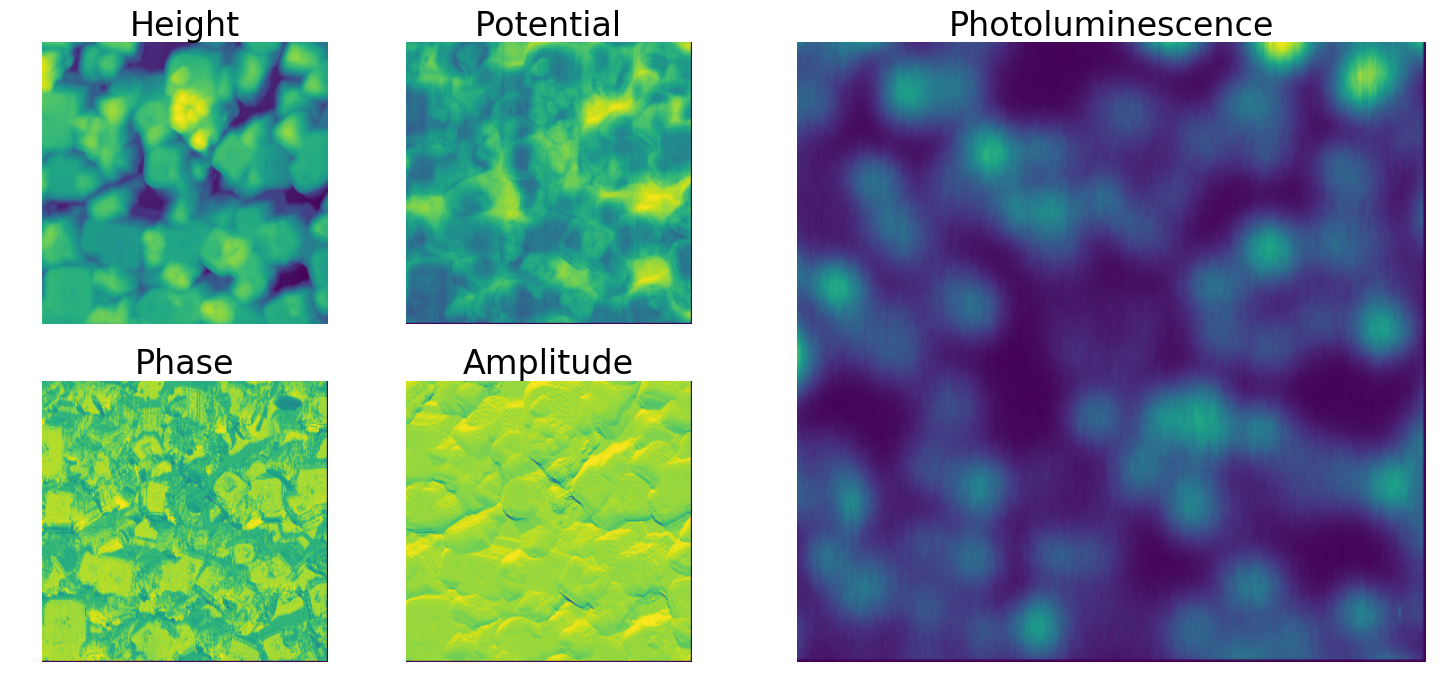

In [6]:
Ht1 = np.loadtxt('MABr.1.Ht.txt',skiprows=0, dtype=np.float64)
Po1 = np.loadtxt('MABr.1.Po.txt',skiprows=0, dtype=np.float64)
Ph1 = np.loadtxt('MABr.1.Ph.txt',skiprows=0, dtype=np.float64)
Am1 = np.loadtxt('MABr.1.Am.txt',skiprows=0, dtype=np.float64)
Pl1 = np.loadtxt('MABr.1.Pl.txt',skiprows=0, dtype=np.float64)

fig = plt.figure(figsize=(18,8), dpi=300)
ht_ax = fig.add_subplot(241)
po_ax = fig.add_subplot(242)
ph_ax = fig.add_subplot(245)
am_ax = fig.add_subplot(246)
pl_ax = fig.add_subplot(122)

ht_ax.imshow(Ht1, cmap='viridis')#cmap='afmhot'
ht_ax.set_title('Height', fontsize=24)
ht_ax.axis('off')

po_ax.imshow(Po1, cmap='viridis')#, cmap='cubehelix'
po_ax.set_title('Potential', fontsize=24)
po_ax.axis('off')

ph_ax.imshow(Ph1, cmap='viridis')
ph_ax.set_title('Phase', fontsize=24)
ph_ax.axis('off')

am_ax.imshow(Am1, cmap='viridis')
am_ax.set_title('Amplitude', fontsize=24)
am_ax.axis('off')

pl_ax.imshow(Pl1, cmap='viridis')
pl_ax.set_title('Photoluminescence', fontsize=24)
pl_ax.axis('off')

plt.show()
fig.savefig(filename='MABr1_1.jpeg', bbox_inches='tight', format='jpeg') 

In [7]:
# flatten the images
Ht1_flat = Ht1.flatten()
Po1_flat = Po1.flatten()
Ph1_flat = Ph1.flatten()
Am1_flat = Am1.flatten()
Pl1_flat = Pl1.flatten()

In [10]:
Pl1_flat

array([ 1.3548808,  1.2793899,  1.1852301, ...,  0.       ,  0.       ,  0.       ])

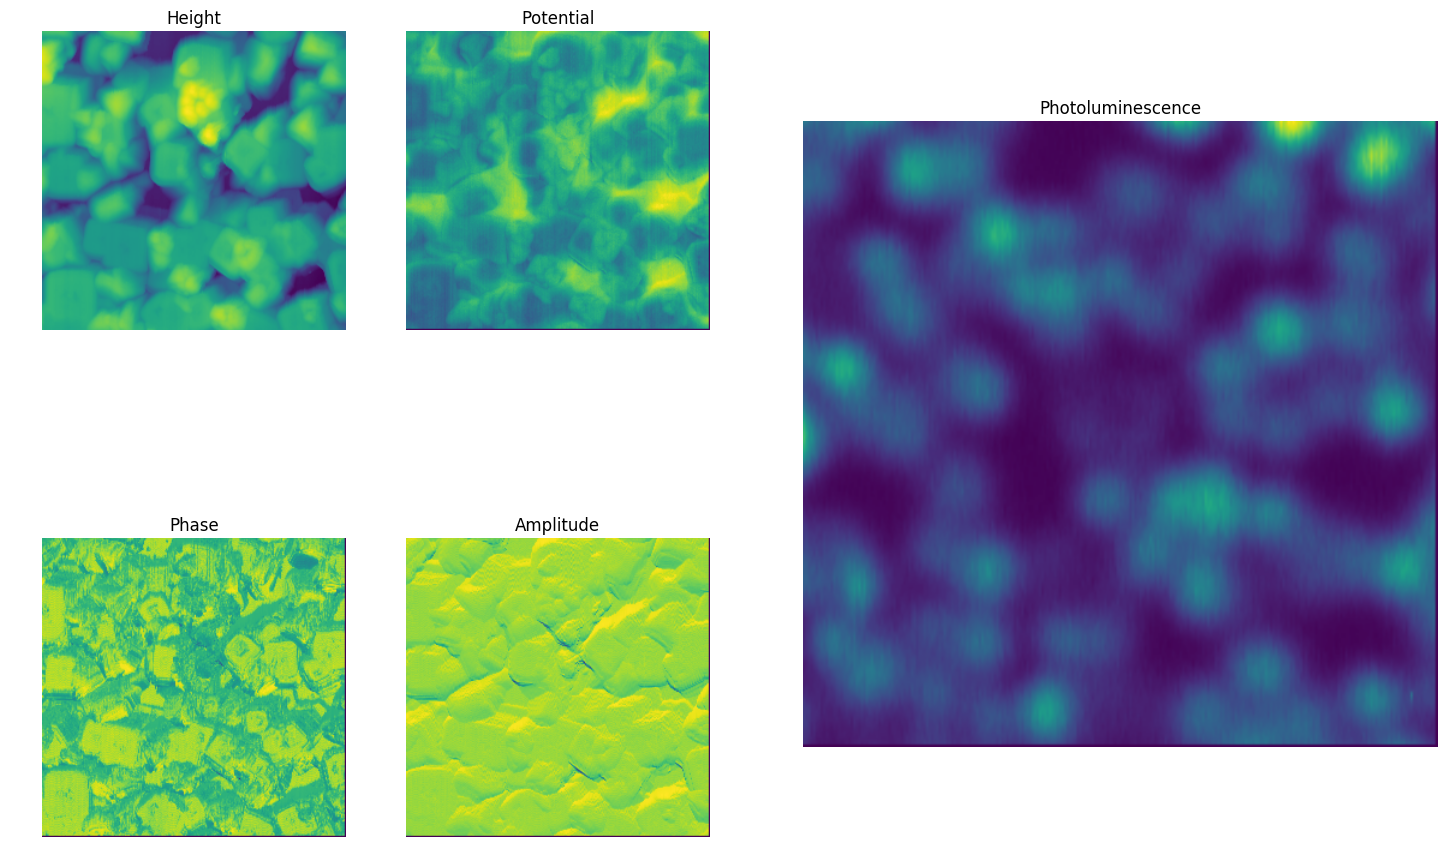

In [18]:
Ht2 = np.loadtxt('MABr.1.Ht.txt',skiprows=0, dtype=np.float64)
Po2 = np.loadtxt('MABr.1.Po.txt',skiprows=0, dtype=np.float64)
Ph2 = np.loadtxt('MABr.1.Ph.txt',skiprows=0, dtype=np.float64)
Am2 = np.loadtxt('MABr.1.Am.txt',skiprows=0, dtype=np.float64)
Pl2 = np.loadtxt('MABr.1.Pl.txt',skiprows=0, dtype=np.float64)

# Ht2 = np.loadtxt('Height.txt',skiprows=0, dtype=np.float64)
# Po2 = np.loadtxt('Potential.txt',skiprows=0, dtype=np.float64)
# Ph2 = np.loadtxt('Phase.txt',skiprows=0, dtype=np.float64)
# Am2 = np.loadtxt('Amplitude.txt',skiprows=0, dtype=np.float64)
# Pl2 = np.loadtxt('Photoluminescence.txt',skiprows=0, dtype=np.float64)

fig = plt.figure(figsize=(18,12))
ht_ax = fig.add_subplot(241)
po_ax = fig.add_subplot(242)
ph_ax = fig.add_subplot(245)
am_ax = fig.add_subplot(246)
pl_ax = fig.add_subplot(122)

ht_ax.imshow(Ht2, cmap='viridis')#cmap='afmhot'
ht_ax.set_title('Height')
ht_ax.axis('off')

po_ax.imshow(Po2, cmap='viridis')#, cmap='cubehelix'
po_ax.set_title('Potential')
po_ax.axis('off')

ph_ax.imshow(Ph2, cmap='viridis')
ph_ax.set_title('Phase')
ph_ax.axis('off')

am_ax.imshow(Am2, cmap='viridis')
am_ax.set_title('Amplitude')
am_ax.axis('off')

pl_ax.imshow(Pl2, cmap='viridis')
pl_ax.set_title('Photoluminescence')
pl_ax.axis('off')

plt.show()

In [29]:
# flatten the images
Ht2_flat = Ht2.flatten()
Po2_flat = Po2.flatten()
Ph2_flat = Ph2.flatten()
Am2_flat = Am2.flatten()
Pl2_flat = Pl2.flatten()

In [31]:
Ht2.shape
Ht2_flat.shape

(63250,)

##Regression Using Random Forests
We'll use a decision tree estimator in scikit-learn: ``sklearn.ensemble.RandomForestRegressor``

I'll start with the simple case of giving each pixel one feature from each image:

In [19]:
X = [Ht2_flat, Po2_flat, Ph2_flat, Am2_flat]
X = np.array(X).T
Y = np.array(Pl2_flat).T
print(X.shape)
print(Y.shape)
Y

(63250, 4)
(63250,)


array([ 1.3548808,  1.2793899,  1.1852301, ...,  0.       ,  0.       ,  0.       ])

In [20]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)
clf = DecisionTreeRegressor(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [21]:
metrics.mean_squared_error(ytest, ypred)

0.14071053669037156

Let's do this again with a single set of data, splitting the testing and training data halfway down the images.

In [22]:
Xtrain = np.array([Ht2_flat[0:31625], Po2_flat[0:31625], Ph2_flat[0:31625], Am2_flat[0:31625]]).T
Xtest = np.array([Ht2_flat[31625:], Po2_flat[31625:], Ph2_flat[31625:], Am2_flat[31625:]]).T
Ytrain = np.array(Pl2_flat[0:31625])
Ytest = np.array(Pl2_flat[31625:])
clf = DecisionTreeRegressor(max_depth=11)
clf.fit(Xtrain, Ytrain)
Ypred = clf.predict(Xtest)
print(metrics.mean_squared_error(Ytest, Ypred))

0.12793162953


In [23]:
x = Ht2.shape[0]
y = Ht2.shape[1]
k=0
merge = np.concatenate((Ytrain,Ypred))
Pl_predict = np.zeros((x,y))
for i in range(x):
    for j in range (y):
        Pl_predict[i,j] = merge[k]
        k = k + 1

Let's see how this looks...

In [26]:
fig = plt.figure(figsize=(18,12))
pl_ax = fig.add_subplot(121)
pl_ax.imshow(Pl_predict, cmap='viridis')
pl_ax.set_title('Photoluminescence')
pl_ax.axis('off')
pl_ax = fig.add_subplot(122)
pl_ax.imshow(Pl1, cmap='viridis')
pl_ax.set_title('Photoluminescence')
pl_ax.axis('off')

(-0.5, 252.5, 249.5, -0.5)

In [25]:
Xtest = np.array([Ht1_flat, Po1_flat, Ph1_flat, Am1_flat]).T
Ytest = np.array([Pl1_flat]).T
Ypred = clf.predict(Xtest)
print(metrics.mean_squared_error(Ytest, Ypred))

0.136602043516


In [27]:
x = Ht1.shape[0]
y = Ht1.shape[1]
k=0
merge = np.concatenate((Ytrain,Ypred))
Pl_predict = np.zeros((x,y))
for i in range(x):
    for j in range (y):
        Pl_predict[i,j] = merge[k]
        k = k + 1

In [28]:
fig = plt.figure(figsize=(18,12))
pl_ax = fig.add_subplot(121)
pl_ax.imshow(Pl_predict, cmap='viridis')
pl_ax.set_title('Photoluminescence')
pl_ax.axis('off')
pl_ax = fig.add_subplot(122)
pl_ax.imshow(Pl1, cmap='viridis')
pl_ax.set_title('Photoluminescence')
pl_ax.axis('off')

(-0.5, 252.5, 249.5, -0.5)

#Scratch Code

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr




pearson_coefficient = pearsonr(Ht_flat, Po_flat)
print 'Pearson Coefficent = {:.3f}'.format(pearson_coefficient[0])

fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(1, 1)
ax = plt.subplot(gs[0, 0])

ax.scatter(Ht_flat, Po_flat)
ax.set_title('Perovskite Data')
ax.set_xlabel('Height')
ax.set_ylabel('Potential')

plt.show()

In [ ]:
from sklearn import preprocessing

height_flat_norm = preprocessing.robust_scale(Ht1_flat)
potential_flat_norm = preprocessing.robust_scale(Po1_flat)

fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(1, 1)
ax = plt.subplot(gs[0, 0])

ax.scatter(height_flat_norm, potential_flat_norm)
ax.set_title('Perovskite Data')
ax.set_xlabel('Height')
ax.set_ylabel('Potential')

plt.show()

In [ ]:
#!/usr/bin/python
#
# Meg Drouhard
# Hierarchical Agglomerative Clustering (HAC) with SciPy for CEI data
# 2/2016

import numpy as np
import scipy.cluster.hierarchy as hac
import scipy.spatial.distance as dist
import pylab
import argparse
import sys



def buildLinkageMatrix(dataMatrix, distanceMeasure):
	# calculate distance 
	distanceMatrix = dist.pdist(dataMatrix, distanceMeasure)
	distanceSquareMatrix = dist.squareform(distanceMatrix)
	linkageMatrix = hac.linkage(distanceSquareMatrix)
	return linkageMatrix

def saveDendrogram(linkageMatrix, label):
	dendrogramName = 'Dendrogram-' + label + '.png'

	# Create and save dendrogram image
	dataDendrogram = hac.dendrogram(linkageMatrix)
	pylab.savefig(dendrogramName)

def printStats(linkageMatrix):
	# Calculate cluster statistics
	copheneticMatrix = hac.cophenet(linkageMatrix)
	copheneticMedian = np.median(copheneticMatrix)
	inconsistencyMatrix = hac.inconsistent(linkageMatrix)
	maxInconsistencyMatrix = hac.maxinconsts(linkageMatrix, inconsistencyMatrix)
	maxInconsistencyMedian = np.median(maxInconsistencyMatrix)
	maxdistsMatrix = hac.maxdists(linkageMatrix)
	maxdistsMedian = np.median(maxdistsMatrix)

	# print stats
	#Cophenetic distance = intergroup dissimilarity
	print "Median Cophenetic distance: " + str(copheneticMedian)
	print "Median Maximum Inconsistency: " + str(maxInconsistencyMedian)
	print "Median MaxDist: " + str(maxdistsMedian)


###############################################################################

# Parse arguments
parser = argparse.ArgumentParser(description='Cluster weighted text hierarchically.')

parser.add_argument('-i',
                        '--input-file',
                        dest='inputfile',
                        required=True,
                        help='input file name')

parser.add_argument('-l',
                        '--label',
                        dest='inputlabel',
                        required=False,
                        help='label for output files')

args = parser.parse_args()

# setup the path argument if provided
if args.inputfile:
    fname = args.inputfile
else:
    sys.exit('Error: missing input file.')

label = ''
if args.inputlabel:
		label = args.inputlabel

with open(fname, 'r') as f:
	# Load data
	data = np.loadtxt(f,skiprows=0)
	# reshape as 256x256 matrix
	dataMatrix = np.reshape(data, (256,256))
	print dataMatrix.shape

	# Plot initial data as image
	pylab.imshow(dataMatrix)
	pylab.show()

	# Build linkage matrices for clustering
	# Euclidean distance
	euclideanLinkageMatrix = buildLinkageMatrix(dataMatrix, 'euclidean')
	# Cosine distance
	cosineLinkageMatrix = buildLinkageMatrix(dataMatrix, 'cosine')
	# Hamming distance
	hammingLinkageMatrix = buildLinkageMatrix(dataMatrix, 'hamming')
	# Jaccard distance
	jaccardLinkageMatrix = buildLinkageMatrix(dataMatrix, 'jaccard')


	# save dendrograms
	saveDendrogram(euclideanLinkageMatrix, label + '-Euclidean')
	saveDendrogram(cosineLinkageMatrix, label + '-Cosine')
	saveDendrogram(hammingLinkageMatrix, label + '-Hamming')
	saveDendrogram(jaccardLinkageMatrix, label +'-Jaccard')
	

	# Calculate and print cluster statistics
	print "Cluster Statistics:"
	print "Eudclidean Distance:"
	printStats(euclideanLinkageMatrix)
	print ""
	print "Cosine Distance:"
	printStats(cosineLinkageMatrix)
	print ""
	print "Hamming Distance:"
	printStats(hammingLinkageMatrix)
	print ""
	print "Jaccard Distance:"
	printStats(jaccardLinkageMatrix)